In [53]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

## Excercise 1

Number of simulation draws: Suppose the scalar variable θ is approximately normally distributed in a posterior distribution that is summarized by n independent simulation draws. How large does n have to be so that the 2.5% and 97.5% quantiles of θ are specified to an accuracy of 0.1sd(θ|y)? (a) Figure this out mathematically, without using simulation. (b) Check your answer using simulation and show your results.

(a) We solve below equation the precise we want $(sd)=\frac{\hat{\sigma_{\theta}}}{\sqrt{S}}$
Now, $0.1\sigma_{\theta}=\frac{\hat{\sigma_{\theta}}}{\sqrt{S}}\iff S=100$ 
When I assume $\theta \sim N(0,1)$

In [2]:
def summ(x):
    percentile=np.percentile(x,[2.5, 25, 50, 75, 97.5]).tolist()
    summ=[np.mean(x), np.std(x)]
    summ.extend(percentile)
    summ=pd.DataFrame(summ,index=["mean","sd","2.5%","25%","50%","75%","97.5%"], columns=["info"]).T
    return summ

theta=[]
for i in range(1000):
    theta.append(np.percentile(np.random.normal(size=600), 2.5))
    
summ(theta)

,mean,sd,2.5%,25%,50%,75%,97.5%
info,-1.948294,0.107489,-2.168682,-2.019452,-1.943739,-1.87362,-1.73658


## Excercise 2

Number of simulation draws: suppose you are interested in inference for the parameter θ1 in a multivariate posterior distribution, p(θ|y). You draw 100 independent values θ from the posterior distribution of θ and find that the posterior density for θ1 is approximately normal with mean of about 8 and standard deviation of about 4. 

### (a) 

Using the average of the 100 draws of θ1 to estimate the posterior mean, E(θ1|y), what is the approximate standard deviation due to simulation variability?

In [27]:
e_thetas=[]
for i in range(100):
    e_thetas.append(np.mean(np.random.normal(8, 4, size=100)))
summ(e_thetas)

,mean,sd,2.5%,25%,50%,75%,97.5%
info,8.098089,0.442936,7.24216,7.816954,8.108957,8.456231,8.883634


Sd is close to 0.4 (sigma/sqrt(S)):

In [28]:
4/np.sqrt(100)

0.4

### (b) 

About how many simulation draws would you need to reduce the simulation standard deviation of the posterior mean to 0.1 (thus justifying the presentation of results to one decimal place)?

can be derived from (sigma/sqrt(S)): S=np.sqrt(4/0.1)

In [18]:
(4/0.1)**2

1600.0

In [30]:
e_thetas=[]
for i in range(100):
    e_thetas.append(np.mean(np.random.normal(8, 4, size=1600)))
summ(e_thetas)

,mean,sd,2.5%,25%,50%,75%,97.5%
info,7.999152,0.106866,7.792903,7.922045,7.993095,8.068472,8.232291


In [33]:
np.std(e_thetas)

0.10686575816661467

### (c) 

A more usual summary of the posterior distribution of θ1 is a 95% central posterior interval. Based on the data from 100 draws, what are the approximate simulation standard deviations of the estimated 2.5% and 97.5% quantiles of the posterior distribution? (Recall that the posterior density is approximately normal.)

In [62]:
lowers=[]
uppers=[]
for i in range(100):
    thetas=np.random.normal(8, 4, size=100)
    lowers.append(np.percentile(thetas, q=0.025))
    uppers.append(np.percentile(thetas, q=0.975))

np.std(lowers), np.std(uppers)

(1.8630245508297931, 1.3228366884606968)

### (d) 

About how many simulation draws would you need to reduce the simulation standard deviations of the 2.5% and 97.5% quantiles to 0.1?

In [65]:
lowers=[]
uppers=[]
for i in range(100):
    thetas=np.random.normal(8, 4, size=1000000)
    lowers.append(np.percentile(thetas, q=0.025))
    uppers.append(np.percentile(thetas, q=0.975))

np.std(lowers), np.std(uppers)

(0.06675518015632258, 0.014749095084452565)

## 3

Posterior computations for the binomial model: suppose y1 ∼ Bin(n1,p1) is the number of successfully treated patients under an experimental new drug,andy2 ∼ Bin(n2,p2) is the number of successfully treated patients under the standardtreatment. Assume that y1 and y2 are independent and assume independent beta prior densities for the two probabilities of success. Let n1 =10,y1 =6, and n2 =20,y2 = 10. Repeat the following for several different beta prior specifications. 

### (a) 

Use simulation to find a 95% posterior interval for p1 −p2 and the posterior probability that p1 >p2

In [66]:
#assume uninformative prior beta(1,1)
n_samp=10000
p1=stats.beta.rvs(6+1, 4+1, size=n_samp)
p2=stats.beta.rvs(10+1, 10+1, size=n_samp)

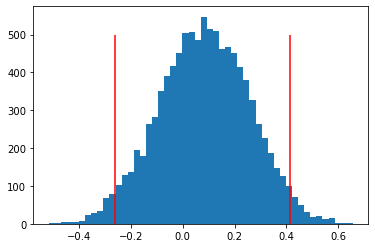

In [72]:
diff=p1-p2
lower=np.quantile(diff, 0.025)
upper=np.quantile(diff, 0.975)
cnt, bins, _=plt.hist(diff, bins=50)
plt.vlines(lower, 0, 500, color='red')
plt.vlines(upper, 0, 500, color='red')

In [81]:
#prob that p1>p2
cnt_norm=cnt/cnt.sum()
cnt_norm[bins[1:]>0].sum()

0.6841999999999998